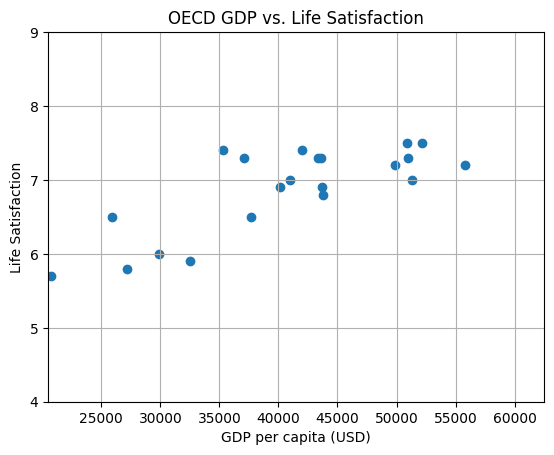

[[6.63577712]]


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and clean GDP data
gdp = pd.read_csv('dataset/gdp_per_capita.csv', 
                  thousands=',', delimiter='\t', 
                  encoding='latin1', na_values="n/a", 
                  index_col="Country")

# Load and clean OECD data
oecd = pd.read_csv('dataset/oecd_bli_2015.csv')
oecd = oecd[oecd["INEQUALITY"]=="TOT"]  # only total values
oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")

# Join both datasets on country name
full_data = pd.merge(left=oecd, right=gdp, left_index=True, right_index=True)
full_data = full_data[["Life satisfaction", "2015"]]  # keep only required cols
full_data = full_data.dropna()  # ensure no NaNs

# Separate X and y
X = full_data[["2015"]]  # GDP
y = full_data[["Life satisfaction"]]  # Life satisfaction

# Plotting
plt.scatter(X, y)
plt.axis([20_500, 62_500, 4, 9])
plt.grid(True)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life Satisfaction")
plt.title("OECD GDP vs. Life Satisfaction")
plt.show()

# Train linear model
model = LinearRegression()
model.fit(X, y)

# Predict
X_new = [[37_655.2]]  # Cyprus GDP
print(model.predict(X_new))


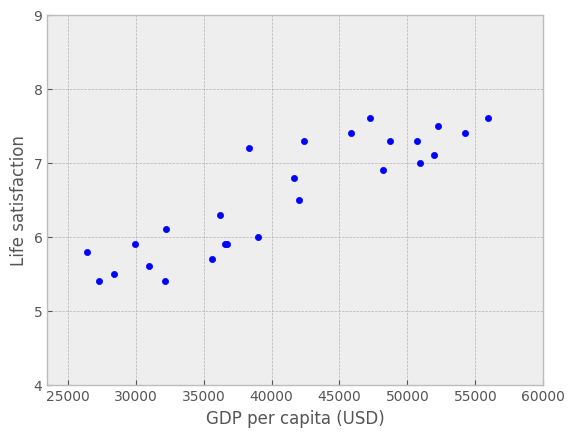

[[6.33333333]]


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

#importing dataset
lifesat = pd.read_csv(r'dataset/lifesat.csv')

#seprate X and y
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

#ploting graph
lifesat.plot(kind='scatter',x='GDP per capita (USD)',y='Life satisfaction',grid=True)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.axis([23_500,60_000,4,9])
plt.style.use('bmh')
plt.show()

#training the model
model=KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)

#predict
X_new = [[37_655.2]]  # Cyprus GDP
print(model.predict(X_new))